In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Step 1: Load the dataset (For this example, we'll generate a synthetic dataset)
# In practice, replace this with a dataset like a CSV or SQL query.
data = {
    'Transaction_Amount': [100, 200, 1500, 300, 120, 250, 2500, 500, 90, 200, 150, 1200, 30, 90, 180],
    'Transaction_Time': [10, 15, 25, 30, 12, 13, 22, 17, 7, 8, 18, 28, 5, 9, 20],
    'User_ID': [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3]
}

# Create DataFrame
df = pd.DataFrame(data)
df
# or give the input of dataset 
# df = pd.read_csv(file_name) 

,Transaction_Amount,Transaction_Time,User_ID
0,100,10,1
1,200,15,2
2,1500,25,3
3,300,30,4
4,120,12,1
5,250,13,2
6,2500,22,3
7,500,17,4
8,90,7,1
9,200,8,2


In [2]:
# Step 2: Preprocess the data
# Normalize the features using StandardScaler (important for DBSCAN)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Transaction_Amount', 'Transaction_Time']])

In [3]:
# Step 3: Apply DBSCAN for anomaly detection
# We assume epsilon=0.5 (max distance for two points to be in the same neighborhood)
# and min_samples=3 (minimum number of points to form a dense region)
dbscan = DBSCAN(eps=0.5, min_samples=3)
df['Cluster'] = dbscan.fit_predict(scaled_data)

In [4]:
# Step 4: Analyze the results
# DBSCAN assigns -1 to noise (anomalies) and cluster labels to normal points
print(df)

    Transaction_Amount  Transaction_Time  User_ID  Cluster
0                  100                10        1        0
1                  200                15        2        0
2                 1500                25        3       -1
3                  300                30        4       -1
4                  120                12        1        0
5                  250                13        2        0
6                 2500                22        3       -1
7                  500                17        4       -1
8                   90                 7        1        0
9                  200                 8        2        0
10                 150                18        3        0
11                1200                28        4       -1
12                  30                 5        1        0
13                  90                 9        2        0
14                 180                20        3        0


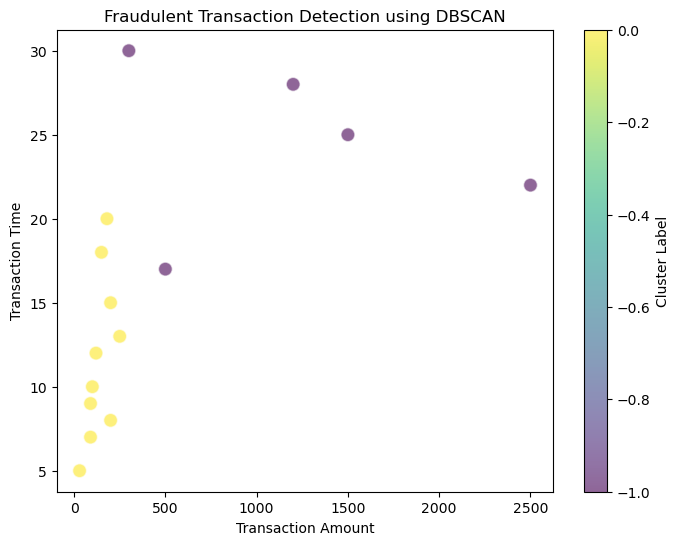

In [5]:
# Step 5: Visualize the clusters and anomalies
plt.figure(figsize=(8, 6))
plt.scatter(df['Transaction_Amount'], df['Transaction_Time'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.6, edgecolors='w')
plt.title('Fraudulent Transaction Detection using DBSCAN')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Time')
plt.colorbar(label='Cluster Label')
plt.show()

In [6]:
# Step 6: Evaluate DBSCAN Performance (e.g., by analyzing the number of noise points)
# In a real dataset, you might compare the anomalies with a known "fraudulent" label
num_anomalies = (df['Cluster'] == -1).sum()
print(f"Number of detected anomalies (fraudulent transactions): {num_anomalies}")

Number of detected anomalies (fraudulent transactions): 5
